(sec_bisection)=
# Bisection Method

In [26]:
# continued from the previous code cell
# a bracket obtained in the previous code cell is used here

def bisection(x1,x2,rtol,nmax):
# function that finds a root in a given bracket
# input: x1, x2 = bracket
#        rtol = tolerance for f(x)
#        nmax = maximum itertation
# output: array of the followings:
#        root = root found by the bisection method
#        func = the function value at the root
#           n = the number of iteration
#
    f1 = f(x1)
    f2 = f(x2)

    # iteration counter
    n=0

    # mid point
    xm = (x1+x2)/2.0
    fm = f(xm)

    while abs(fm) > rtol and n < nmax:
        if f1*fm < 0:  # root in the lower half
            x2=xm
            f2=fm
        else:          # root in the upper half
            x1=xm
            f1=fm

        xm = (x1+x2)/2.0      # new mid point
        fm = f(xm)
        n+=1

    return [xm, fm ,n]

# main routine starts here

# set a tolerance
rtol = 1.e-6

# setr maximum iteration
nmax = 100
   
for k in range(3):
    [root, func, n]=bisection(xL[k],xU[k],rtol,nmax)
    print("root= {0:10.7e}, f(x)= {1:15.8e}, iteration= {2:3d}".format(root, func, n))


root= 1.0000000e+00, f(x)=  0.00000000e+00, iteration=  11
root= 3.0000000e+00, f(x)=  0.00000000e+00, iteration=   9
root= 5.0000000e+00, f(x)=  0.00000000e+00, iteration=  14


In this section, a simple but robust root-finding algorithm called the bisection method. This method reuires a initial bracket.  Thus, the first step is to _bracket_ the target root $x^*$ between $x_L$ and $x_U$ such that $x_L < x^* < x_U$.  It is important that there is only one root between $x_L$ and $x_U$.  It turns out that this is not an trivial task for computer. Human eyes can find the bracket easily by plotting the function.  Therefore, the best practice is to plot the function and bracket the target root by visual inspection.  However, in some cases it is desirable to have a robust numerical method to find the bracket. For example,  when root finding is required many times during long computer simulation, you can't stop the simulation to visually inspect the bracket.   There are simple algorithms of finding the bracket but unfortunately no method guarantees the outcome.   In this chapter, we assume that the bracket is done by direct visual inspection.

Any iterative method needs a criteria to stop the iteration. Ultimately, we stop it when the error is smaller than the tolerance.  However, in practice we never know the exact error.  If we knew it, we have the exact root! Therefore, we must carefully choose an ending criteria.


## Bracketing a root

Pick two different points, $x_1$ and $x_2$.  If $f(x_1) f(x_2) < 0$, there must be at least one root between $x$1 and $x_2$.  It does not say that there is only one.  There may be any odd number of roots.  On the other hand, if $f(x_1) f(x_2) > 0$, then either no root or even number of roots between $x_1$ and $x_2$.  If $x_1 - x_2$ is small enough, we hope that there is only one root for the former case and no root in the latter case. But this is just a home and no guarantee.  Let use choose thet two point not far from each other such that $x_2 > x_1$ and $f(x_1) f(x_2) > 0$.  Assuming there is not root between the two points, we gradually reduce $x_1$ or increase $x_2$ until $f(x_1) f(x_2)$ change the sign.  At the end, $x_1$ and $x_2$ are the bracket.

**Example**  Bracket all positive roots of $x^3 - 9 x^2 +23 x - 15$.

In [1]:
import numpy as np


def f(x):
    return x**3-9*x**2+23*x-15

# search root between xmax and 0
xmax=10.0

# initial step size
dx = 0.1

# create empty array
xL=[]
xU=[]
    
# initial two points
x1 = 0.0
x2 = x1+dx

while x2< xmax:
    
    if f(x1)*f(x2)>0:
        # no root yet
        # expand the upper bound
        x3 = x2+ 1.6 *(x2-x1)
        x1 = x2
        x2 = x3
        
    else:
        # found a bracket
        xL.append(x1)
        xU.append(x2)
        print("found a bracket. [{0:8.5e}, {1:8.5e}]".format(x1,x2))

        # reset the two points for next bracket
        x1 = x2
        x2 = x1+dx

print("reached xmax")

found a bracket. [9.25600e-01, 1.58096e+00]
found a bracket. [2.50656e+00, 3.16192e+00]
found a bracket. [4.74288e+00, 5.79146e+00]
reached xmax


Noting that $x^3 - 9 x^2 +23 x - 15 = (x-1)(x-3)(x-5)$,  there are three positive roots.  The above code successfully fond the three brackets.  You can also find the brackets easily by plotting the function.  In the following plotting, the lower and upper bounds of each bracket are indicated by blue and green lines respectively. The roots shown as black dots are inside the bracket.

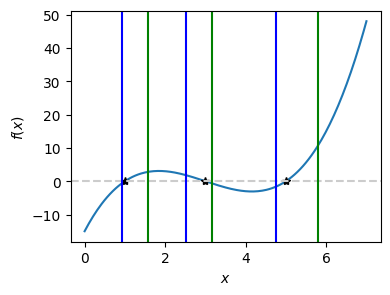

In [4]:
# continued from the previous code cell

import matplotlib.pyplot as plt

x=np.linspace(0,7,201)
y=f(x)

plt.figure(figsize=(4,3))
plt.plot(x,y)
plt.plot([1,3,5],[0,0,0],'*k')
plt.xlabel(r"$x$")
plt.ylabel(r"$f(x)$")
plt.axhline(y = 0, color = '0.8', linestyle = '--')

for k in range(3):
    plt.axvline(x = xL[k], color='b', linestyle = '-')
    plt.axvline(x = xU[k], color='g', linestyle = '-')

## Bisection Method

The bisection method is simple and robust.  Howeve, it may consume more cpu time than other approaches.
Starting with an initial bracket, the bracket is narrowed by a half. Repeating this procedure until the bracket becomes so narrow that the the lower and upper limits of the bracket is almost identical.  Then, its midpoint is the root with a desired accuracy. Consider  a n initial bracket $[x_L,x_U]$. The mid point $x_M$ between  $x_L$ and $x_U$ divide the bracket into two smaller intervals $[x_L,x_M]$ and $[x_M,x_U]$.  One of the interval brackets the root.  If $f(x_L) f(x_M) < 0$, the root must be between $x_L$ and $x_M$.  Now we have a new bracket $[x_L,x_M]$.  Otherwise, the root must be between $x_M$ and $x_U$, which is the new bracket.  Repeating this procedure, the root is isolated in a small region. Noting that the error cannot be bigger than $x_U-x_L$ and thus the iteration is terminated when $x_U-x_L < \text{xtol}$. Instead of the absolute error, we can use relative error, for example $(x_U-x_L)< rtol X_M$.  

Alternatively, we can use the tolerance based on the function value.  If the function value is close enough to 0, that is $|f(x_M)| < \text{ftol}$, we stop the iteration. When the slop of the curve near the root is small, xtol works better.  In the opposite case, ftol is better. cannot It is better to set the maximum number of iteration just in case the termination condition never be satisfied.

Figure {numref}`fig-bisection` demonstrates how the bisection method works.

```{figure} bisection.png
---
height: 300px
name: fig-bisection
---
Bisection method. Starting with an initial bracket $(x_0, x_1)$, the bracket is halved at each iteration to $(x_2,x_1)$, $(x_2,x_3)$, $(x_2, x_4)$, $(x_5, x_4)$, $\cdots$.  Notice that $x_5$ is already quite close to the root.
```

```{admonition} Algorithm: Bisection Method

1. Get a initial bracket $x_L$ and $x_U$ and a tolerance xtol or rtol.
2. Make it sure that $f(x_L) f(x_U) <0$.  Otherwise, stop and check the initial bracket.
3. Evaluate the function at the mid point $x_M = \frac{1}{2}(x_L+x_U)$.
4. If $x_U - x_L< xtol$ or $|f(x_M)|< ftol, $x_M$ is the root and stop here.  Otherwise continue.
5. If $f(x_L) f(x_M) < 0$, then the root is between $x_L$ and $x_M$.  Let $x_U=x_M$ and go to step 3.  Otherwise continue.
6. The root must be between $x_M$ and $x_U$.  Let $x_L=x_M$ and go to Step 3.

```

**Example**  We solve $x^3 - 9 x^2 +23 x - 15=0$.  The roots are already bracketed in the previous example.   We use rtol.

In [31]:
# continued from the previous code cell
# a bracket obtained in the previous code cell is used here

def bisection(x1,x2,ftol,nmax):
# function that finds a root in a given bracket
# input: x1, x2 = bracket
#        ftol = tolerance for f(x)
#        nmax = maximum itertation
# output: array of the followings:
#        root = root found by the bisection method
#        func = the function value at the root
#           n = the number of iteration
#
    f1 = f(x1)
    f2 = f(x2)

    # iteration counter
    n=0

    # mid point
    xm = (x1+x2)/2.0
    fm = f(xm)

    while abs(fm) > ftol and n < nmax:
        if f1*fm < 0:  # root in the lower half
            x2=xm
            f2=fm
        else:          # root in the upper half
            x1=xm
            f1=fm

        xm = (x1+x2)/2.0      # new mid point
        fm = f(xm)
        n+=1

    return [xm, fm ,n]

# main routine starts here

# set a tolerance
ftol = 1.e-6

# setr maximum iteration
nmax = 100
   
for k in range(3):
    [root, func, n]=bisection(xL[k],xU[k],ftol,nmax)
    print("root= {0:10.7e}, f(x)= {1:15.8e}, iteration= {2:3d}".format(root, func, n))


root= 1.0000000e+00, f(x)=  0.00000000e+00, iteration=  11
root= 3.0000000e+00, f(x)=  0.00000000e+00, iteration=   9
root= 5.0000000e+00, f(x)=  0.00000000e+00, iteration=  14


> **Exercise**  Do the same calculation with xtol. Try to get the most accurate results with a small tolerance. Which tolerance is better for this function, xtol or rtol?

## Canned routine

Once we understood the algorithm, it is a bit safer to use a canned routine.  `scipy.optimize` provides `bisect`.  The default tolerance is xtol $=2 \times 10^{-12}$ and rtol$=8.881784197001252 \times 10^{-16}$. We can change it using the option `xtol=` and/or `rtol=`.  When both are specified, the iteration stops as soon as one of the conditions is satisfied.  By default the iteration is limited to 100 but can be changed with option "maxiter=".

In [30]:
# continued from the previous code cells

from scipy.optimize import bisect

# using xtol
r=bisect(f,xL[1],xU[1],xtol=1e-6)
print("root with xtol= {0:12.6e}".format(r))

# using rtol
r=bisect(f,xL[1],xU[1],rtol=1e-6)
print("root with rtol= {0:12.6e}".format(r))

root with xtol= 3.000000e+00
root with rtol= 3.000000e+00


> _Exercise:_   Knowing that $x^3 - 4 x^2 + x - 6$ has only one negative root, find it by the bisection method.


___

Last modified on 3/13/2024 by R. Kawai